In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse)) 
    return psnr 



[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.  17. -81. ...  -9.   1.   0.]
 [  0.  33. -38. ... -23.  -8.   0.]
 [  0.  20. -20. ... -18.  -4.   0.]] [[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0 17 81 ...  9  1  0]
 [ 0 33 38 ... 23  8  0]
 [ 0 20 20 ... 18  4  0]]
5.621585122647662 4.585480795998105 27.465621824878127


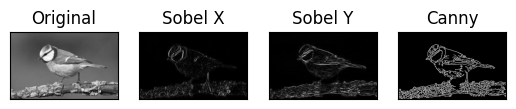

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
1.5553941918769771 1.9380564699176714 30.186769900456405


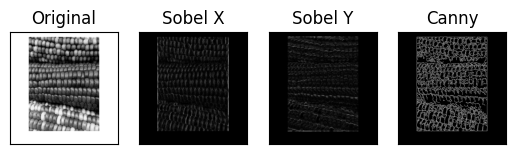

[[   0. -228. -398. ...  114.   58.    0.]
 [   0. -171. -369. ...   28.    1.    0.]
 [   0.  -57. -312. ...  -87.  -85.    0.]
 ...
 [   0.    0. -171. ...    0.  -58.    0.]
 [   0.    0.  -86. ...  -28.  -87.    0.]
 [   0.    0.  -58. ...  -56. -116.    0.]] [[  0 228 398 ... 114  58   0]
 [  0 171 369 ...  28   1   0]
 [  0  57 312 ...  87  85   0]
 ...
 [  0   0 171 ...   0  58   0]
 [  0   0  86 ...  28  87   0]
 [  0   0  58 ...  56 116   0]]
1.5454819612180164 1.6694858677910382 28.02378673278589


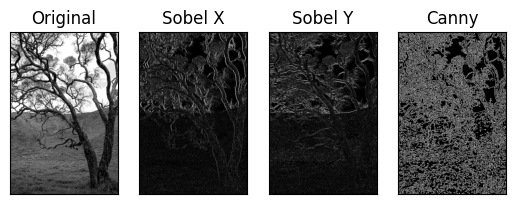

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
6.924483537050379 8.41504195853024 37.08249405504516


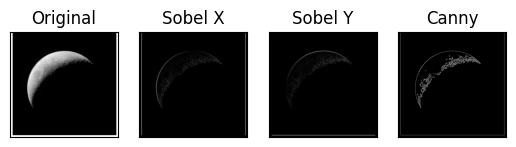

In [12]:
for i in range(0, 4):
    img = cv2.imread('{}.png'.format(i), cv2.IMREAD_GRAYSCALE)
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 3)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 3)
    canny = cv2.Canny(img, 100, 200)
    
    asbx = np.abs(sobelx)
    asby = np.abs(sobely)
    
    sba = np.uint16(asbx)
    sbb = np.uint16(asby)
    print(PSNR(img, sobelx) , PSNR(img, sobely) , PSNR(img, canny))
    
    plt.subplot(1, 4, 1), plt.imshow(img, cmap='gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(1, 4, 2), plt.imshow(sba, cmap='gray')
    plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
    plt.subplot(1, 4, 3), plt.imshow(sbb, cmap='gray')
    plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
    plt.subplot(1, 4, 4), plt.imshow(canny, cmap='gray')
    plt.title('Canny'), plt.xticks([]), plt.yticks([])
    plt.show()